<a href="https://colab.research.google.com/github/guilhermegranchopro/Eco-AI.ly-Models/blob/main/LSTM/Renewable_Percentage/Creat_LSTM_Renewable_Percentage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Previsão da Intensidade de Carbono (LCA) com LSTM

 ## Objetivo Geral  
Treinar uma **LSTM** para prever a **intensidade de carbono (LCA)** nas próximas 24 horas, com base nos últimos 24 registros.  
A previsão será feita como uma **classificação em uma escala de 0 a 5**, onde os valores são inferidos da amplitude histórica dos dados de LCA.

 ---

## Etapas do Projeto  

### **1. Aquisição e Organização dos Dados**  
#### 📌 Leitura dos CSVs:  
- Carregar os arquivos:  
  - `PT_2021_hourly.csv`  
  - `PT_2022_hourly.csv`  
  - `PT_2023_hourly.csv`  
- Extrair as colunas relevantes:  
  - **Código temporal (data e hora)**  
  - **Intensidade de carbono (LCA)**  
- Unificar os três CSVs em um único **dataframe**.  

#### 📌 Tratamento de Dados Faltantes:  
- Identificar e tratar dados ausentes ou inconsistentes (removendo ou preenchendo valores).  

#### 📌 Ordenação Temporal:  
- Garantir que os dados estejam **ordenados cronologicamente** para preservar a sequência temporal.  

---

### **2. Construção da Escala de Classificação**  
#### 📌 Cálculo dos Limiares da Escala (0 a 5):  
- Obter os valores **mínimo e máximo históricos** da intensidade de carbono (LCA).  
- Dividir a amplitude `[mínimo, máximo]` em **5 intervalos iguais**:  
  - **Intervalo 0**: Valores abaixo de `x`.  
  - **Intervalos 1 a 4**: Divisões intermediárias.  
  - **Intervalo 5**: Valores acima de `y`.  

#### 📌 Mapeamento para Classes:  
- Criar uma **nova coluna** no dataframe para armazenar as classes (0 a 5) com base na escala calculada.  

---

### **3. Pré-processamento dos Dados**  
#### 📌 Criação das Sequências Temporais:  
- Gerar sequências de entrada com **24 horas de dados** (janelas deslizantes).  
- **Entrada**: Valores de **LCA das últimas 24 horas**.  
- **Saída**: Classe (0 a 5) correspondente à previsão das **próximas 24 horas**.  

#### 📌 Divisão do Dataset:  
- **Treino (70%)**  
- **Validação (15%)**  
- **Teste (15%)**  

#### 📌 Normalização dos Dados de Entrada (Opcional):  
- Caso necessário, normalizar os valores de LCA para uma escala específica, como **[0,1]**.  
- **Justificar e documentar a escolha.**  

---

### **4. Construção e Treinamento do Modelo LSTM**  
#### 📌 Configuração do Modelo:  
- **Arquitetura**:  
  - Uma ou mais camadas **LSTM**.  
  - Camadas **densas** para produzir a saída.  
  - Função de ativação **softmax** na última camada para classificação.  

#### 📌 Configuração do Treinamento:  
- **Perda**: `SparseCategoricalCrossentropy` (para classificação).  
- **Otimizador**: `Adam`.  
- **Métrica de Avaliação**: **Acurácia** ou outra métrica relevante.  

#### 📌 Treinamento do Modelo:  
- Treinar o modelo com o **conjunto de treinamento**.  
- Validar o desempenho durante o treinamento com o **conjunto de validação**.  

---

### **5. Avaliação do Modelo**  
#### 📌 Avaliação nos Dados de Teste:  
- Testar o modelo no **conjunto de teste**.  
- Calcular métricas como:  
  - **Acurácia**  
  - **Precisão**  
  - **Recall**  
  - **F1-score**  

#### 📌 Análise de Resultados:  
- Gerar **gráficos de desempenho**:  
  - Curvas de aprendizado (**perda e acurácia** durante o treinamento).  
  - **Matriz de confusão** para as classes (0 a 5).  

---

### **6. Testes e Ajustes**  
#### 📌 Testes com Dados Reais:  
- Verificar o desempenho do modelo em **dados não vistos** (se disponíveis).  

#### 📌 Ajustes no Modelo:  
- Ajustar **hiperparâmetros**, como:  
  - Número de **unidades LSTM**.  
  - **Taxa de aprendizado**.  
  - **Tamanho do batch**.  

#### 📌 Testes com Normalização de Entrada:  
- Comparar o desempenho do modelo **com e sem normalização**.  

---

### **7. Documentação e Finalização**  
#### 📌 Documentação Completa:  
- Explicar cada etapa do **pipeline**, incluindo **decisões e justificativas**.  

#### 📌 Entrega do Código:  
- Organizar o código em um **notebook estruturado**:  
  - **Seções** para cada etapa do pipeline.  
  - **Gráficos** e explicações nos locais apropriados.  

#### 📌 Conclusão:  
- **Resumo dos resultados alcançados**.  
- **Sugestões para trabalhos futuros**.  

---

## Observações Importantes  
✅ **Escala de Saída (0 a 5):** Deve ser baseada nos valores históricos dos CSVs.  
✅ **Normalização de Entrada:** Deve ser justificada e explicada.  
✅ **Foco em Classificação:** O problema será tratado como **uma tarefa de classificação com 6 classes**.

In [1]:
# Montar o Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importa as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import tensorflow as tf
import joblib

# Coleta as versões das bibliotecas
pandas_ver = pd.__version__
numpy_ver = np.__version__
matplotlib_ver = matplotlib.__version__
seaborn_ver = sns.__version__
sklearn_ver = sklearn.__version__
tensorflow_ver = tf.__version__
joblib_ver = joblib.__version__

In [3]:
# Cria uma lista com as dependências no formato para o arquivo requirements.txt
requirements = [
    f"pandas=={pandas_ver}",
    f"numpy=={numpy_ver}",
    f"matplotlib=={matplotlib_ver}",
    f"seaborn=={seaborn_ver}",
    f"scikit-learn=={sklearn_ver}",
    f"tensorflow=={tensorflow_ver}",
    f"joblib=={joblib_ver}"
]

# Define o caminho para salvar o arquivo no Google Drive (ajuste se necessário)
requirements_file_path = '/content/drive/My Drive/Modelos/RP_requirements.txt'

# Escreve o arquivo com as versões
with open(requirements_file_path, 'w') as f:
    for line in requirements:
        f.write(line + "\n")

print("Arquivo requirements.txt salvo em:", requirements_file_path)

Arquivo requirements.txt salvo em: /content/drive/My Drive/Modelos/RP_requirements.txt


In [4]:
# Bibliotecas para machine learning e deep learning
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Etapa 1: Aquisição e Organização dos Dados

1. Montar o Google Drive no Google Colab.
2. Carregar os três CSVs diretamente do Google Drive.
3. Combinar os dados em um único dataframe, mantendo apenas as colunas relevantes:
  * Código temporal (data e hora).
  * Intensidade de carbono (LCA).
4. Garantir a ordenação cronológica dos dados.
5. Tratar dados faltantes ou inconsistentes.

In [5]:
# Bibliotecas necessárias
path = '/content/drive/My Drive/Data/Eletricity_Maps/Portugal/Hourly/'

# Caminhos dos arquivos no Google Drive
file_2021 = path + 'PT_2021_hourly.csv'
file_2022 = path + 'PT_2022_hourly.csv'
file_2023 = path + 'PT_2023_hourly.csv'
file_2024 = path + 'PT_2024_hourly.csv'

# Leitura dos arquivos CSV
df_2021 = pd.read_csv(file_2021)
df_2022 = pd.read_csv(file_2022)
df_2023 = pd.read_csv(file_2023)
df_2024 = pd.read_csv(file_2024)

# Combinação dos dados
df_combined = pd.concat([df_2021, df_2022, df_2023, df_2024], ignore_index=True)

# Seleção das colunas relevantes
df_combined = df_combined[['Datetime (UTC)', 'Renewable Percentage']]  # Substitua 'timestamp' e 'LCA' pelos nomes reais das colunas

# Ordenação cronológica
df_combined['Datetime (UTC)'] = pd.to_datetime(df_combined['Datetime (UTC)'])
df_combined = df_combined.sort_values(by='Datetime (UTC)')

In [6]:
# Exibição das primeiras linhas
print("Dados combinados e organizados:")
print(df_combined.head())

Dados combinados e organizados:
       Datetime (UTC)  Renewable Percentage
0 2021-01-01 00:00:00                 85.21
1 2021-01-01 01:00:00                 85.03
2 2021-01-01 02:00:00                 81.34
3 2021-01-01 03:00:00                 79.36
4 2021-01-01 04:00:00                 79.73


In [7]:
# Verificar dados ausentes antes de remover
missing_data = df_combined[df_combined.isnull().any(axis=1)]

# Exibir linhas com valores ausentes
print("\nLinhas com valores ausentes:")
print(missing_data)

# Exibir contagem de valores ausentes por coluna
print("\nContagem de valores ausentes por coluna:")
print(df_combined.isnull().sum())

# Tratamento de dados faltantes (remover linhas com valores ausentes)
df_combined = df_combined.dropna()

# Exibição do resumo após tratamento
print("\nResumo dos dados após remoção de valores ausentes:")
print(df_combined.info())


Linhas com valores ausentes:
Empty DataFrame
Columns: [Datetime (UTC), Renewable Percentage]
Index: []

Contagem de valores ausentes por coluna:
Datetime (UTC)          0
Renewable Percentage    0
dtype: int64

Resumo dos dados após remoção de valores ausentes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Datetime (UTC)        35064 non-null  datetime64[ns]
 1   Renewable Percentage  35064 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 548.0 KB
None


In [8]:
# Exibição do resumo dos dados
print("\nResumo dos dados combinados:")
print(df_combined.info())


Resumo dos dados combinados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Datetime (UTC)        35064 non-null  datetime64[ns]
 1   Renewable Percentage  35064 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 548.0 KB
None


# Etapa 2: Construção da Escala de Classificação (0 a 5).

Transformar a intensidade de carbono (LCA) em uma escala de classificação de 0 a 5, utilizando a amplitude dos valores históricos.

1. Calcular a amplitude dos dados históricos de LCA:

  * Obter o valor mínimo (min_LCA) e o valor máximo (max_LCA) da intensidade de carbono nos dados combinados.

2. Criar os intervalos da escala:

  * Dividir a amplitude
[
𝑚
𝑖
𝑛
𝐿
𝐶
𝐴
,
𝑚
𝑎
𝑥
𝐿
𝐶
𝐴
]
[min
L
​
 CA,max
L
​
 CA] em 5 partes iguais para definir os limiares
𝑥
1,
𝑥
2
,
𝑥
3
,
𝑥
4
​
 .
  * O valor 0 representará qualquer valor abaixo de
𝑥
1
 , enquanto o valor 5 representará qualquer valor acima de
𝑥
4
 .
3. Mapear os valores de LCA para a escala de classificação:

  * Criar uma nova coluna LCA_Class onde cada valor de LCA será transformado em uma
das 6 classes (0 a 5).

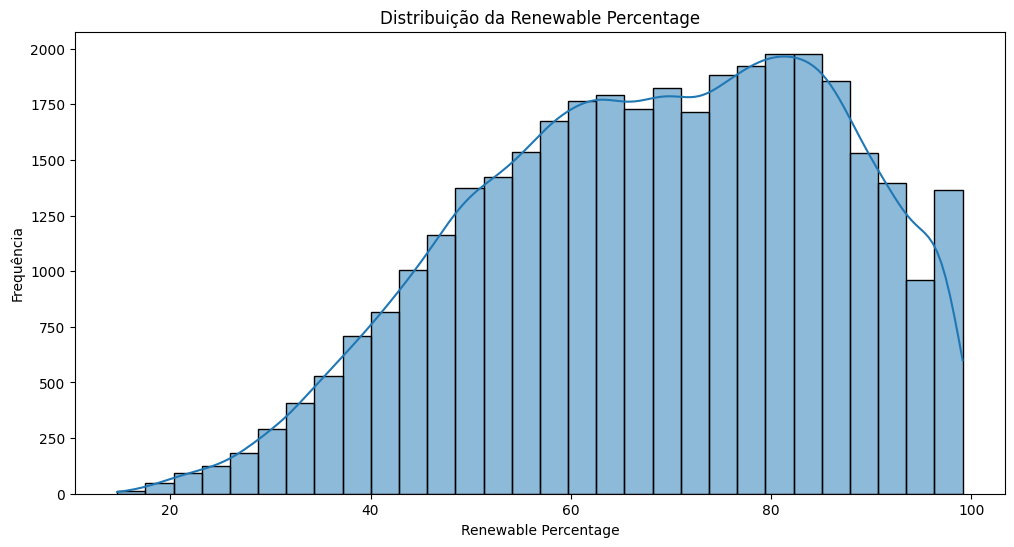

In [9]:
# Histograma da intensidade de carbono (LCA)
plt.figure(figsize=(12, 6))
sns.histplot(df_combined['Renewable Percentage'], bins=30, kde=True)
plt.xlabel('Renewable Percentage')
plt.ylabel('Frequência')
plt.title('Distribuição da Renewable Percentage')
plt.show()

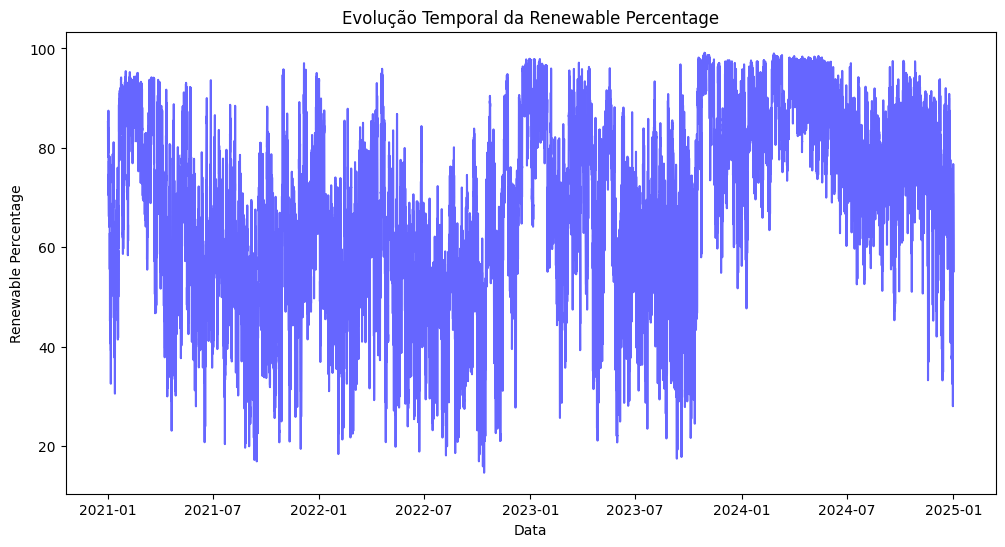

In [10]:
# Série temporal da intensidade de carbono
plt.figure(figsize=(12, 6))
plt.plot(df_combined['Datetime (UTC)'], df_combined['Renewable Percentage'], color='blue', alpha=0.6)
plt.xlabel('Data')
plt.ylabel('Renewable Percentage')
plt.title('Evolução Temporal da Renewable Percentage')
plt.show()

# Etapa 3: Preparação dos Dados para a LSTM


Converter os dados em sequências temporais adequadas para treinar o modelo LSTM. A entrada será baseada nos últimos 24 datapoints, e a saída será a classificação das próximas 24 horas.

1. Definir o tamanho da janela temporal:

  * Cada entrada será formada por uma sequência de 24 horas (últimos 24 datapoints).
A saída será a classe (0 a 5) correspondente às próximas 24 horas.

2. Criar as sequências temporais:

  * Usar um loop para transformar o dataframe em conjuntos de entradas (X) e saídas (y) adequados para a LSTM.

3. Dividir os dados:

  * Dividir em conjuntos de treinamento (70%), validação (15%) e teste (15%).

4. Normalização (opcional):

  * Decidir se os valores de entrada (LCA) devem ser normalizados. Caso seja necessário, normalizar apenas os valores de entrada (não as classes).

In [11]:
# =============================================================================
# 1. Carregar e preparar o DataFrame
# -----------------------------------------------------------------------------
# Supondo que 'df_combined' seja o seu DataFrame original, contendo:
# - A coluna de datas: 'Datetime (UTC)' (que não usaremos para os cálculos numéricos)
# - A coluna target: 'Carbon Intensity gCO₂eq/kWh (LCA)'
target_col = 'Renewable Percentage'

# Copiar o DataFrame para não alterar o original
df = df_combined.copy()
print("Shape do DataFrame original:", df.shape)
print(df.head())

Shape do DataFrame original: (35064, 2)
       Datetime (UTC)  Renewable Percentage
0 2021-01-01 00:00:00                 85.21
1 2021-01-01 01:00:00                 85.03
2 2021-01-01 02:00:00                 81.34
3 2021-01-01 03:00:00                 79.36
4 2021-01-01 04:00:00                 79.73


In [12]:
# =============================================================================
# 2. Dividir o dataset em treino, validação e teste
# -----------------------------------------------------------------------------
n_total = len(df)
train_size = int(n_total * 0.70)
val_size   = int(n_total * 0.15)
test_size  = n_total - train_size - val_size

train_df = df.iloc[:train_size].copy()
val_df   = df.iloc[train_size:train_size+val_size].copy()
test_df  = df.iloc[train_size+val_size:].copy()

print("\nTamanho dos conjuntos:")
print("Treino:", train_df.shape)
print("Validação:", val_df.shape)
print("Teste:", test_df.shape)


Tamanho dos conjuntos:
Treino: (24544, 2)
Validação: (5259, 2)
Teste: (5261, 2)


In [13]:
# =============================================================================
# 3. Escalonar os binnes no dataset de treino com MinMaxScaler para o intervalo [0, 5]
#    (apenas para a coluna target)
# -----------------------------------------------------------------------------
scaler_bins = MinMaxScaler(feature_range=(0, 5))
train_bins = scaler_bins.fit_transform(train_df[[target_col]])
train_df['bins'] = train_bins

print("\nExemplo dos binnes no treino (intervalo [0,5]):")
print(train_df[[target_col, 'bins']].head())


Exemplo dos binnes no treino (intervalo [0,5]):
   Renewable Percentage      bins
0                 85.21  4.224179
1                 85.03  4.213396
2                 81.34  3.992332
3                 79.36  3.873712
4                 79.73  3.895878


In [14]:
# =============================================================================
# 4. Usar os mesmos binnes no dataset de validação e de teste com o mesmo scaler_bins
# -----------------------------------------------------------------------------
val_bins = scaler_bins.transform(val_df[[target_col]])
test_bins = scaler_bins.transform(test_df[[target_col]])

val_df['bins'] = val_bins
test_df['bins'] = test_bins

print("\nExemplo dos binnes no conjunto de validação:")
print(val_df[[target_col, 'bins']].head())
print("\nExemplo dos binnes no conjunto de teste:")
print(test_df[[target_col, 'bins']].head())


Exemplo dos binnes no conjunto de validação:
       Renewable Percentage      bins
24544                 90.98  4.569854
24545                 95.24  4.825066
24546                 97.91  4.985023
24547                 97.84  4.980829
24548                 97.20  4.942487

Exemplo dos binnes no conjunto de teste:
       Renewable Percentage      bins
29803                 89.89  4.504553
29804                 90.25  4.526120
29805                 87.76  4.376947
29806                 82.89  4.085191
29807                 81.17  3.982147


In [15]:
# =============================================================================
# 5. Normalizar os dados de treino com MinMaxScaler (intervalo [0,1]) para a coluna target
# -----------------------------------------------------------------------------
scaler_norm = MinMaxScaler(feature_range=(0, 1))
train_norm = scaler_norm.fit_transform(train_df[[target_col]])
train_df['norm'] = train_norm

print("\nExemplo da normalização (intervalo [0,1]) no treino:")
print(train_df[[target_col, 'norm']].head())


Exemplo da normalização (intervalo [0,1]) no treino:
   Renewable Percentage      norm
0                 85.21  0.844836
1                 85.03  0.842679
2                 81.34  0.798466
3                 79.36  0.774742
4                 79.73  0.779176


In [16]:
# =============================================================================
# 6. Usar o mesmo scaler_norm para o dataset de validação e de teste (coluna target)
# -----------------------------------------------------------------------------
val_norm = scaler_norm.transform(val_df[[target_col]])
test_norm = scaler_norm.transform(test_df[[target_col]])

val_df['norm'] = val_norm
test_df['norm'] = test_norm

print("\nExemplo da normalização no conjunto de validação:")
print(val_df[[target_col, 'norm']].head())
print("\nExemplo da normalização no conjunto de teste:")
print(test_df[[target_col, 'norm']].head())


Exemplo da normalização no conjunto de validação:
       Renewable Percentage      norm
24544                 90.98  0.913971
24545                 95.24  0.965013
24546                 97.91  0.997005
24547                 97.84  0.996166
24548                 97.20  0.988497

Exemplo da normalização no conjunto de teste:
       Renewable Percentage      norm
29803                 89.89  0.900911
29804                 90.25  0.905224
29805                 87.76  0.875389
29806                 82.89  0.817038
29807                 81.17  0.796429


In [17]:
# Salvar o scaler ajustado
joblib.dump(scaler_norm, '/content/drive/My Drive/Modelos/minmax_scaler_RP.pkl')

print("MinMaxScaler salvo com sucesso!")

MinMaxScaler salvo com sucesso!


In [18]:
# =============================================================================
# 7. Para cada janela de 24 valores, calcular o rótulo (y)
#    a partir da janela subsequente: a média dos 24 valores de 'bins' da janela futura,
#    arredondada para o inteiro mais próximo.
# -----------------------------------------------------------------------------
window_size = 24  # Tamanho da janela (24 pontos)

def create_forecasting_sequences_mode(input_array, bin_array, window_size):
    """
    Cria sequências de entrada e os respectivos rótulos de previsão usando a moda.

    Para cada índice i:
      - X é definida como os valores normalizados de input_array[i : i + window_size]
      - y é definida como a moda dos valores arredondados de bin_array[i + window_size : i + 2 * window_size]

    Retorna: X (entrada) e y (rótulos)
    """
    X, y = [], []
    for i in range(len(input_array) - 2 * window_size + 1):
        X_window = input_array[i : i + window_size]
        # Primeiro, arredonda os valores da janela futura
        future_window = np.round(bin_array[i + window_size : i + 2 * window_size])
        # Calcula a moda dos valores arredondados
        mode_val = pd.Series(future_window).mode()[0]
        X.append(X_window)
        y.append(int(mode_val))
    return np.array(X), np.array(y)

# Extrair os arrays de valores normalizados e de binnes para cada conjunto:
train_norm_array = train_df['norm'].values
val_norm_array   = val_df['norm'].values
test_norm_array  = test_df['norm'].values

train_bins_array = train_df['bins'].values
val_bins_array   = val_df['bins'].values
test_bins_array  = test_df['bins'].values

# Criar as sequências: a entrada é a janela atual e o rótulo é derivado da próxima janela, agora com a moda
X_train, y_train = create_forecasting_sequences_mode(train_norm_array, train_bins_array, window_size)
X_val, y_val     = create_forecasting_sequences_mode(val_norm_array, val_bins_array, window_size)
X_test, y_test   = create_forecasting_sequences_mode(test_norm_array, test_bins_array, window_size)

print("Exemplo de rótulos de treino (usando a moda) - primeiros 10:", y_train[:10])

Exemplo de rótulos de treino (usando a moda) - primeiros 10: [3 3 3 3 3 3 3 3 3 3]


In [19]:
# =============================================================================
# 8. Preparar o dataset para a LSTM: ajustar a dimensão para (samples, timesteps, features)
# -----------------------------------------------------------------------------
# Aqui, temos uma única feature (os valores normalizados).
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val   = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
X_test  = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

print("Dimensões dos dados de entrada após o reshape:")
print("X_train:", X_train.shape)
print("X_val:", X_val.shape)
print("X_test:", X_test.shape)

Dimensões dos dados de entrada após o reshape:
X_train: (24497, 24, 1)
X_val: (5212, 24, 1)
X_test: (5214, 24, 1)


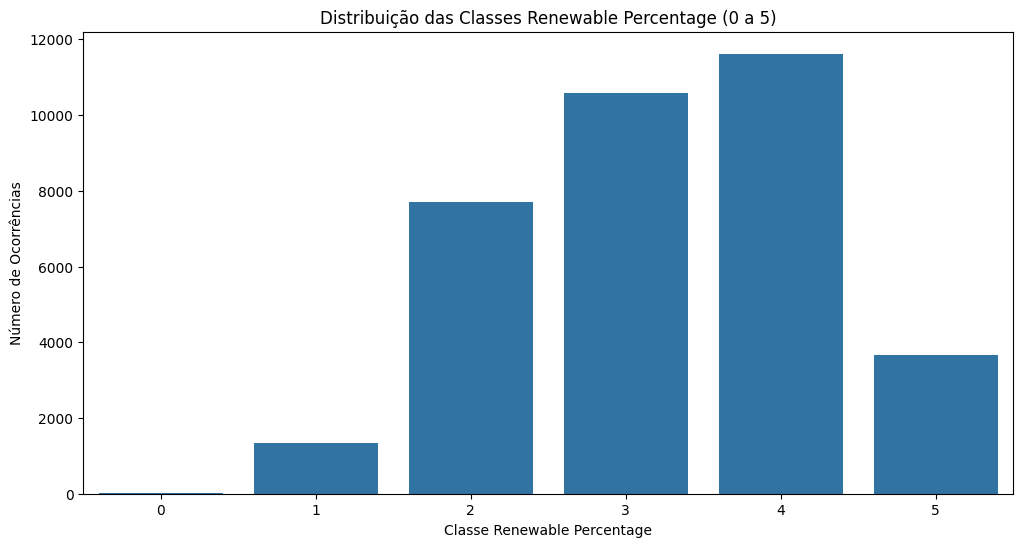

In [20]:
plt.figure(figsize=(12, 6))
data = pd.concat([pd.Series(y_train), pd.Series(y_val), pd.Series(y_test)], ignore_index=True)
sns.countplot(x=data)
plt.xlabel('Classe Renewable Percentage')
plt.ylabel('Número de Ocorrências')
plt.title('Distribuição das Classes Renewable Percentage (0 a 5)')
plt.show()

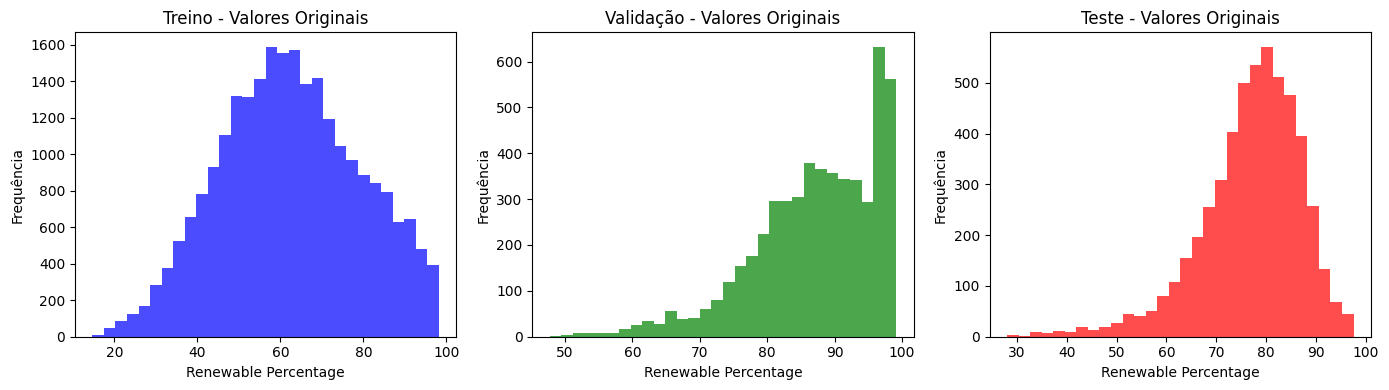

In [21]:
# Gráfico 1: Histogramas dos valores originais do target para cada conjunto
plt.figure(figsize=(14, 4))
plt.subplot(1, 3, 1)
plt.hist(train_df[target_col], bins=30, color='blue', alpha=0.7)
plt.title('Treino - Valores Originais')
plt.xlabel(target_col)
plt.ylabel('Frequência')

plt.subplot(1, 3, 2)
plt.hist(val_df[target_col], bins=30, color='green', alpha=0.7)
plt.title('Validação - Valores Originais')
plt.xlabel(target_col)
plt.ylabel('Frequência')

plt.subplot(1, 3, 3)
plt.hist(test_df[target_col], bins=30, color='red', alpha=0.7)
plt.title('Teste - Valores Originais')
plt.xlabel(target_col)
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

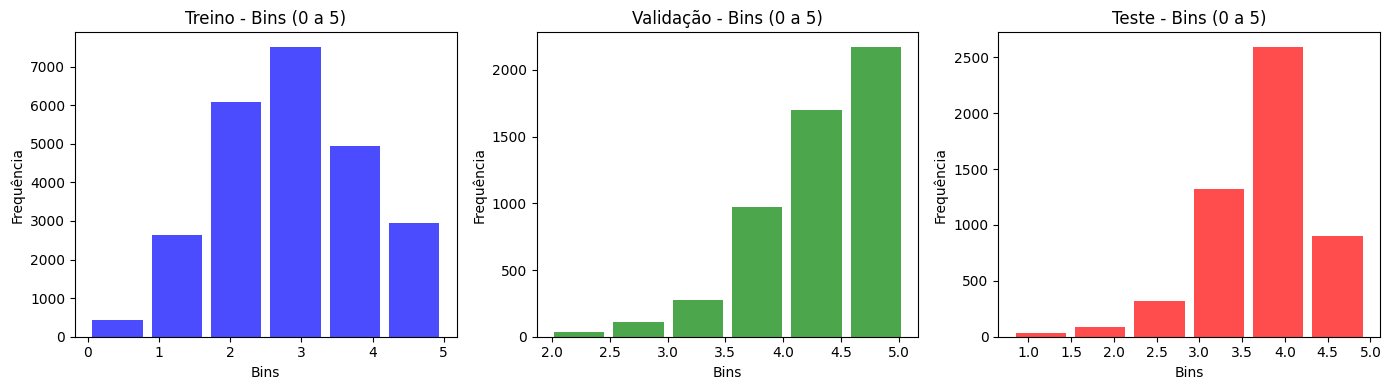

In [22]:
# Gráfico 2: Histogramas dos "bins" (escala 0 a 5) para cada conjunto
plt.figure(figsize=(14, 4))
plt.subplot(1, 3, 1)
plt.hist(train_df['bins'], bins=6, color='blue', alpha=0.7, rwidth=0.85)
plt.title('Treino - Bins (0 a 5)')
plt.xlabel('Bins')
plt.ylabel('Frequência')

plt.subplot(1, 3, 2)
plt.hist(val_df['bins'], bins=6, color='green', alpha=0.7, rwidth=0.85)
plt.title('Validação - Bins (0 a 5)')
plt.xlabel('Bins')
plt.ylabel('Frequência')

plt.subplot(1, 3, 3)
plt.hist(test_df['bins'], bins=6, color='red', alpha=0.7, rwidth=0.85)
plt.title('Teste - Bins (0 a 5)')
plt.xlabel('Bins')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

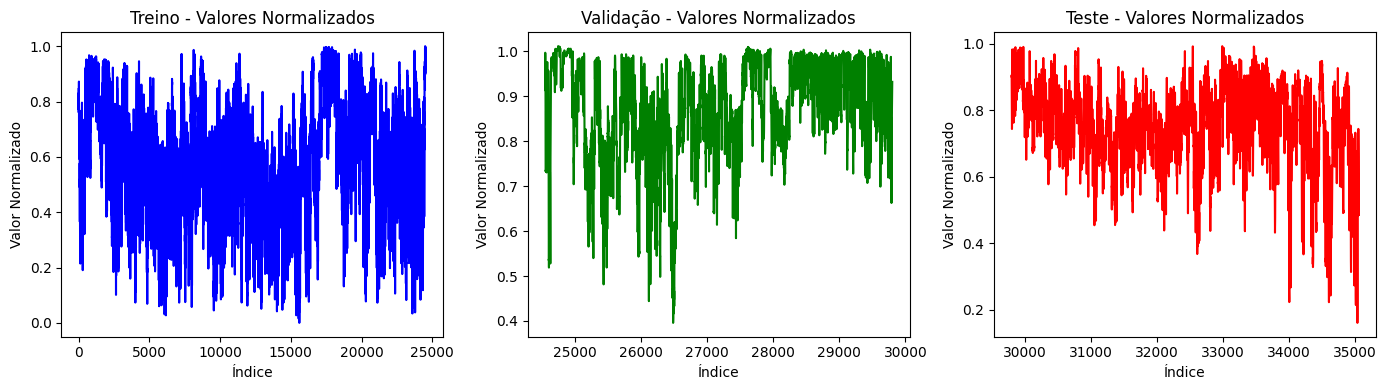

In [23]:
# Gráfico 3: Série temporal dos valores normalizados (escala [0,1]) para cada conjunto
plt.figure(figsize=(14, 4))
plt.subplot(1, 3, 1)
plt.plot(train_df['norm'], color='blue')
plt.title('Treino - Valores Normalizados')
plt.xlabel('Índice')
plt.ylabel('Valor Normalizado')

plt.subplot(1, 3, 2)
plt.plot(val_df['norm'], color='green')
plt.title('Validação - Valores Normalizados')
plt.xlabel('Índice')
plt.ylabel('Valor Normalizado')

plt.subplot(1, 3, 3)
plt.plot(test_df['norm'], color='red')
plt.title('Teste - Valores Normalizados')
plt.xlabel('Índice')
plt.ylabel('Valor Normalizado')

plt.tight_layout()
plt.show()

# Etapa 4: Construção e Treinamento do Modelo LSTM

Criar uma arquitetura LSTM que use as sequências temporais geradas (últimos 24 pontos) como entrada e preveja a classificação de intensidade de carbono (0 a 5) para as próximas 24 horas.

1. Definir a arquitetura da LSTM:

  * Usar uma ou mais camadas LSTM para capturar padrões temporais.
  * Adicionar camadas densas para mapear as saídas às 6 classes (0 a 5).

2. Configuração do modelo:

  * Função de perda: SparseCategoricalCrossentropy (problema de classificação).
  * Métrica: Acurácia.
  * Otimizador: Adam (bom para problemas com dados sequenciais).

3. Treinamento do modelo:

  * Definir número de épocas e tamanho do batch.
  * Usar o conjunto de validação para monitorar o desempenho.

4. Salvar e avaliar o modelo:

  * Avaliar no conjunto de teste.
  * Salvar o modelo treinado para uso posterior.

In [24]:
# Construção do modelo com melhorias
model = Sequential([
    LSTM(128, activation='tanh', return_sequences=True, recurrent_dropout=0.2, input_shape=(X_train.shape[1], 1)),
    BatchNormalization(),
    Dropout(0.3),
    LSTM(64, activation='tanh', return_sequences=False, recurrent_dropout=0.2),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dense(6, activation='softmax')
])


# Compilação do modelo
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
# Resumo do modelo
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 24, 128)             │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 24, 128)             │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 24, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             198 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 119,142 (465.40 KB)

 Trainable params: 118,694 (463.65 KB)

 Non-trainable params: 448 (1.75 KB)

In [26]:
# Callbacks adicionais
early_stopping = EarlyStopping(monitor='val_loss', patience=200, restore_best_weights=True)
checkpoint = ModelCheckpoint('CI_best_LSTM.keras', monitor='val_loss', save_best_only=True)

# Treinamento do modelo
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=750,
    batch_size=64,
    callbacks=[early_stopping, checkpoint]
)

Epoch 1/750
383/383 ━━━━━━━━━━━━━━━━━━━━ 47s 100ms/step - accuracy: 0.5180 - loss: 1.3057 - val_accuracy: 0.0528 - val_loss: 3.1391
Epoch 2/750
383/383 ━━━━━━━━━━━━━━━━━━━━ 38s 98ms/step - accuracy: 0.6085 - loss: 0.9219 - val_accuracy: 0.4912 - val_loss: 0.9882
Epoch 3/750
383/383 ━━━━━━━━━━━━━━━━━━━━ 37s 97ms/step - accuracy: 0.6085 - loss: 0.8967 - val_accuracy: 0.7277 - val_loss: 0.6243
Epoch 4/750
383/383 ━━━━━━━━━━━━━━━━━━━━ 37s 97ms/step - accuracy: 0.6178 - loss: 0.8886 - val_accuracy: 0.6057 - val_loss: 0.8506
Epoch 5/750
383/383 ━━━━━━━━━━━━━━━━━━━━ 37s 97ms/step - accuracy: 0.6155 - loss: 0.8718 - val_accuracy: 0.7402 - val_loss: 0.6362
Epoch 6/750
383/383 ━━━━━━━━━━━━━━━━━━━━ 37s 97ms/step - accuracy: 0.6164 - loss: 0.8706 - val_accuracy: 0.7268 - val_loss: 0.6548
Epoch 7/750
383/383 ━━━━━━━━━━━━━━━━━━━━ 37s 97ms/step - accuracy: 0.6138 - loss: 0.8804 - val_accuracy: 0.6955 - val_loss: 0.7002
Epoch 8/750
383/383 ━━━━━━━━━━━━━━━━━━━━ 37s 98ms/step - accuracy: 0.6149 - loss: 

KeyboardInterrupt: 

In [27]:
# Avaliação do modelo no conjunto de teste
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nLoss no conjunto de teste: {loss}")
print(f"Acurácia no conjunto de teste: {accuracy}")

163/163 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.6881 - loss: 0.8241

Loss no conjunto de teste: 0.9815769791603088
Acurácia no conjunto de teste: 0.6482546925544739


# Etapa 5: Avaliação e Análise de Resultados

Avaliar o desempenho do modelo treinado no conjunto de teste, identificar possíveis áreas de melhoria e visualizar os resultados.

1. Avaliação do Modelo no Conjunto de Teste:

  * Calcular métricas como acurácia, precisão, recall e F1-score por classe.
  * Gerar a matriz de confusão para analisar o desempenho do modelo em cada classe.

2. Gráficos de Desempenho:

  * Curvas de perda e acurácia: Para treino e validação ao longo das épocas.
  * Matriz de confusão: Visualizar onde o modelo acerta e erra.

3. Predições no Conjunto de Teste:

  * Fazer predições no conjunto de teste.
  * Comparar as classes previstas com as reais.

In [28]:
# Análise de resultados
# Predições no conjunto de teste
y_pred = np.argmax(model.predict(X_test), axis=1)

163/163 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step


In [29]:
# Relatório de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))


Relatório de Classificação:
              precision    recall  f1-score   support

           2       0.01      0.02      0.01        64
           3       0.38      0.53      0.44      1172
           4       0.84      0.70      0.76      3880
           5       0.21      0.56      0.31        98

    accuracy                           0.65      5214
   macro avg       0.36      0.45      0.38      5214
weighted avg       0.71      0.65      0.67      5214



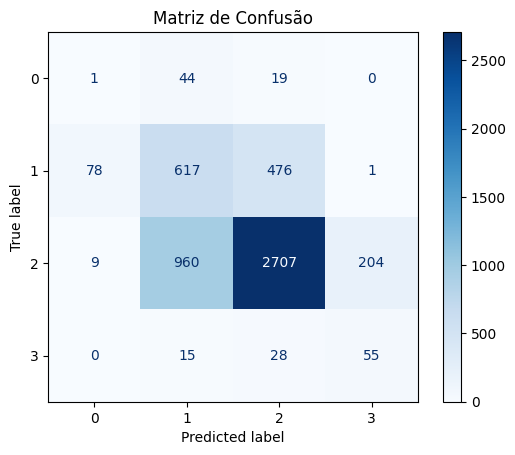

In [30]:
# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(conf_matrix, display_labels=[0, 1, 2, 3]).plot(cmap='Blues')
plt.title('Matriz de Confusão')
plt.show()

In [31]:
# Gráficos de desempenho
# Curvas de perda e acurácia
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Perda - Treinamento')
plt.plot(history.history['val_loss'], label='Perda - Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.title('Curvas de Perda')
plt.legend()
plt.show()

NameError: name 'history' is not defined

<Figure size 1200x600 with 0 Axes>

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Acurácia - Treinamento')
plt.plot(history.history['val_accuracy'], label='Acurácia - Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.title('Curvas de Acurácia')
plt.legend()
plt.show()

In [ ]:
# Tabela de desempenho no conjunto de teste
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

print("\nTabela de Desempenho do Modelo:")
print(report_df)

In [ ]:
# Exibir a tabela como um gráfico
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-3, :-1], annot=True, fmt='.2f', cmap='Blues', cbar=False)
plt.title('Tabela de Desempenho do Modelo')
plt.show()

# Etapa 6: Teste e Ajustes do Modelo

Refinar o modelo LSTM para melhorar seu desempenho com base nos resultados obtidos na etapa anterior.

1. Análise dos Resultados:

  * Revisar a matriz de confusão e as métricas por classe.
  * Identificar classes onde o modelo teve baixa performance e entender os possíveis motivos (dados desbalanceados, dificuldade em capturar padrões, etc.).

2. Ajustes de Hiperparâmetros:

  * Experimentar diferentes configurações de hiperparâmetros:
    * Número de unidades na LSTM.
    * Número de camadas (adicionar uma segunda LSTM, por exemplo).
    * Taxa de aprendizado.
    * Tamanho do batch.

3. Regularização:

  *   * Adicionar técnicas de regularização para evitar overfitting:
  * Dropout em camadas densas ou LSTM.
  * Aumentar o valor de patience no Early Stopping.

4. Normalização dos Dados:

  * Verificar se a normalização dos valores de entrada melhora a performance.
  * Aplicar técnicas como Min-Max Scaling ou Standard Scaling.

5. Teste com Mais Dados:

  * Garantir que o modelo esteja sendo treinado com um volume adequado de dados.
Caso tenha dados adicionais, incorporá-los ao treinamento.

6. Salvamento dos Melhores Modelos:

  * Salvar modelos com diferentes configurações e comparar seus desempenhos.

# Etapa 7: Documentação e Conclusão

Organizar todos os resultados, gráficos e análises em uma estrutura clara, explicando as escolhas feitas no projeto e fornecendo conclusões baseadas nos resultados.

1. Resumo do Projeto:

  * Objetivo geral: Prever a intensidade de carbono em uma escala de 0 a 5 usando um modelo LSTM.
  * Breve descrição do pipeline:
  * Coleta e pré-processamento de dados.
  * Construção de sequências temporais.
  * Configuração, treinamento e ajuste do modelo LSTM.
  * Análise e visualização dos resultados.

2. Resultados e Análises:

  * Exibição dos principais gráficos:
  * Curvas de perda e acurácia.
  * Matriz de confusão.
  * Tabela de métricas por classe.
  * Destaques sobre o desempenho do modelo:
  * Classes em que o modelo teve maior acurácia.
  * Classes desafiadoras e possíveis motivos.

3. Lições Aprendidas:

  * Reflexão sobre o processo.
  * Impacto de ajustes no desempenho (e.g., normalização, mudanças na arquitetura).

4. Conclusões:

  * Resumo dos insights principais obtidos.
  * Aplicações práticas para prever intensidade de carbono.

5. Próximos Passos:

  * Sugestões para trabalhos futuros:
  * Testar com mais dados históricos.
  * Comparar com outros algoritmos de machine learning.
  * Implementar o modelo em tempo real.

In [ ]:
# Salvar o modelo
model.save('/content/drive/My Drive/Modelos/LSTM_RP_Model.keras')


Gerando relatório do projeto...
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step


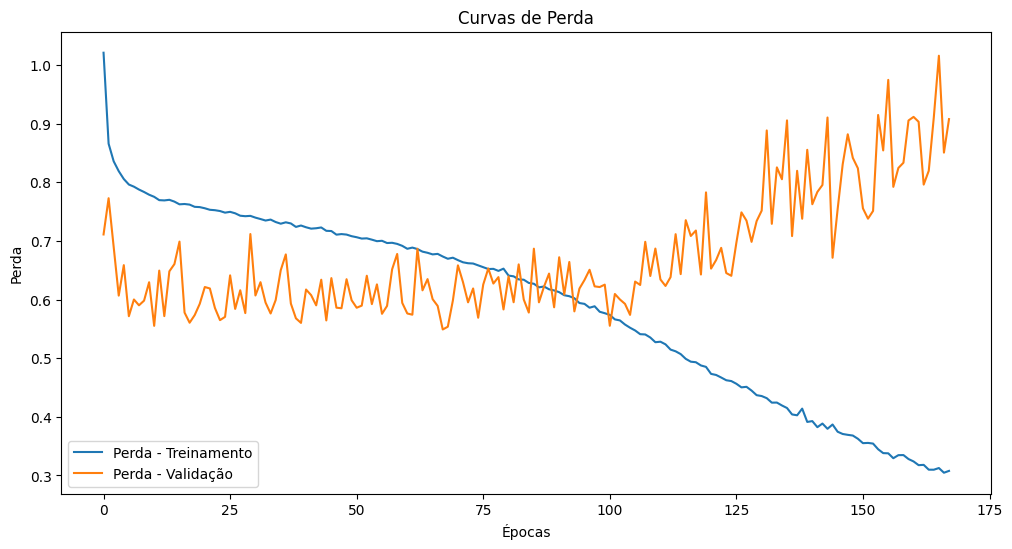

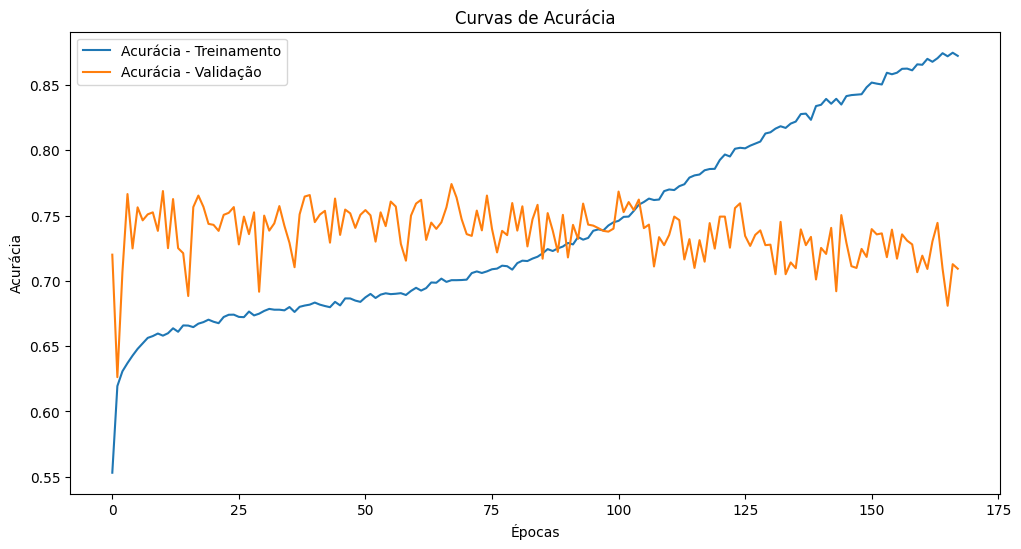

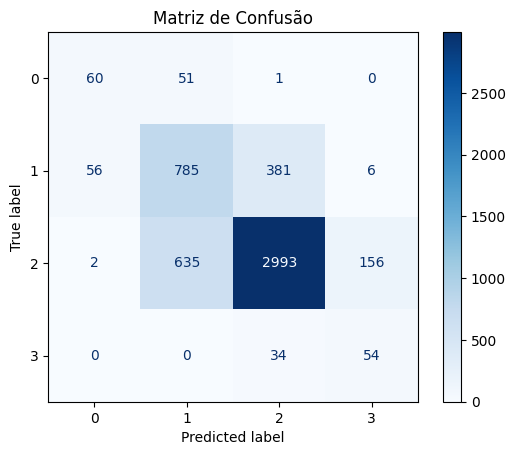

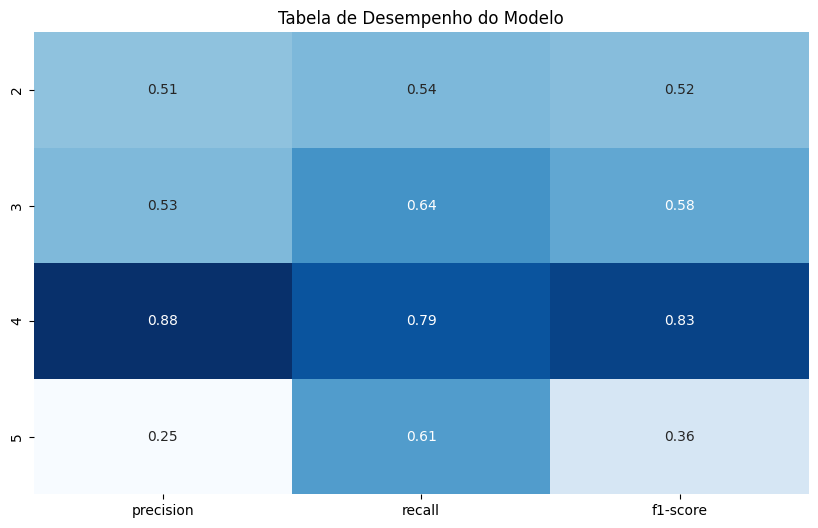

Relatório gerado e salvo no Google Drive.


In [ ]:
# Geração do relatório automatizado
print("\nGerando relatório do projeto...")

path2 = '/content/drive/My Drive/Relatórios/Modelo LSTM Renewable Percentage/'

# Criar um relatório consolidado com gráficos e análises
with open(path2 + 'LSTM_RP_Report.html', 'w') as f:
    f.write("<html><head><title>Relatório do Projeto LSTM</title></head><body>")
    f.write("<h1>Relatório do Projeto LSTM para Renewable Percentage</h1>")

    # Adicionar resumo do modelo
    f.write("<h2>Resumo do Modelo</h2>")
    f.write(f"<p>Loss no conjunto de teste: {loss:.4f}</p>")
    f.write(f"<p>Acurácia no conjunto de teste: {accuracy:.4f}</p>")

    # Adicionar gráficos de desempenho
    f.write("<h2>Curvas de Desempenho</h2>")
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Perda - Treinamento')
    plt.plot(history.history['val_loss'], label='Perda - Validação')
    plt.xlabel('Épocas')
    plt.ylabel('Perda')
    plt.title('Curvas de Perda')
    plt.legend()
    plt.savefig(path2 + 'loss_plot.png')
    f.write("<img src='loss_plot.png' width='600'>")

    plt.figure(figsize=(12, 6))
    plt.plot(history.history['accuracy'], label='Acurácia - Treinamento')
    plt.plot(history.history['val_accuracy'], label='Acurácia - Validação')
    plt.xlabel('Épocas')
    plt.ylabel('Acurácia')
    plt.title('Curvas de Acurácia')
    plt.legend()
    plt.savefig(path2 + 'accuracy_plot.png')
    f.write("<img src='accuracy_plot.png' width='600'>")

    # Adicionar matriz de confusão
    f.write("<h2>Matriz de Confusão</h2>")
    conf_matrix = confusion_matrix(y_test, np.argmax(model.predict(X_test), axis=1))
    ConfusionMatrixDisplay(conf_matrix, display_labels=[0, 1, 2, 3]).plot(cmap='Blues')
    plt.title('Matriz de Confusão')
    plt.savefig(path2 + 'confusion_matrix.png')
    f.write("<img src='confusion_matrix.png' width='600'>")

    # Adicionar a imagem da tabela como gráfico
    f.write("<h2>Tabela de Desempenho do Modelo</h2>")
    # Exibir a tabela como um gráfico e salvar a imagem
    plt.figure(figsize=(10, 6))
    sns.heatmap(report_df.iloc[:-3, :-1], annot=True, fmt='.2f', cmap='Blues', cbar=False)
    plt.title('Tabela de Desempenho do Modelo')
    plt.savefig(path2 + 'heatmap_table.png')  # Salva a imagem na mesma pasta
    plt.show()
    f.write("<img src='heatmap_table.png' width='600'>")

    # Finalizar relatório
    f.write("</body></html>")

print("Relatório gerado e salvo no Google Drive.")